# Time series forecasting fundamentals with TensorFlow + Milestone Project 3: BitPredict 💰

## Get data

We're going to be using the historical price of Bitcoin to try and predict the future price of Bitcoin

In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-01-30 13:51:52--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1'

     0K .......... .......... .......... .......... .......... 28% 4.71M 0s
    50K .......... .......... .......... .......... .......... 57% 13.4M 0s
   100K .......... .......... .......... .......... .......... 86% 6.49M 0s
   150K .......... .......... ....                            100% 21.0M=0.02s

2023-01-30 13:51:53 (7.51 MB/s) - 'BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1' saved [178509/178509]



## Import time series data with Pandas

In [5]:
# Import pandas
import pandas as pd

# Let's read in the data
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column and tell pandas column 1 is a date time

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
# Last samples from the data set
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [7]:
# Grab info from the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


We've collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples. 

Typically, deep learning models like lots of samples. 1,000 - 10,000 - 1,000,000

A smaller number of samples is something you'll often run into with time series data problems

In [8]:
# How many samples
len(df) # 365 * 8

2787

In [9]:
# Only having the closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


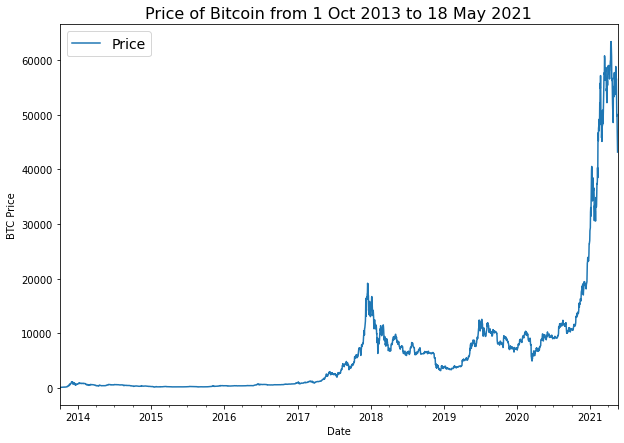

In [10]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16);
plt.legend(fontsize=14);

## Importing time series data with Python's CSV module

In [11]:
# Importing and formatting 
import csv
from datetime import datetime

timesteps = []
btc_price = []

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader = csv.reader(f,delimiter=",")
    next(csv_reader) # skip first line (gets ride of column titles)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d")) # Get the dates as dates (not strings)
        btc_price.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_price[:10]        

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

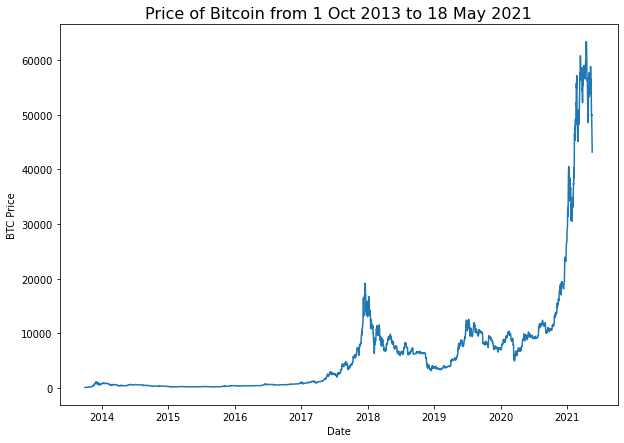

In [12]:
# Plot from csv
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021",fontsize=16);

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [13]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [14]:
# Wrong way to make train/test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

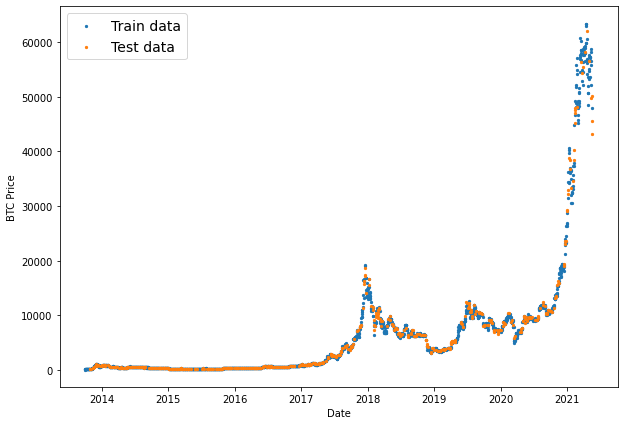

In [15]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14);
plt.show();

### Create train & test sets for time series (the right way)

In [16]:
# Create train and test splits the right way for time series data
split_size = int(0.8*len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

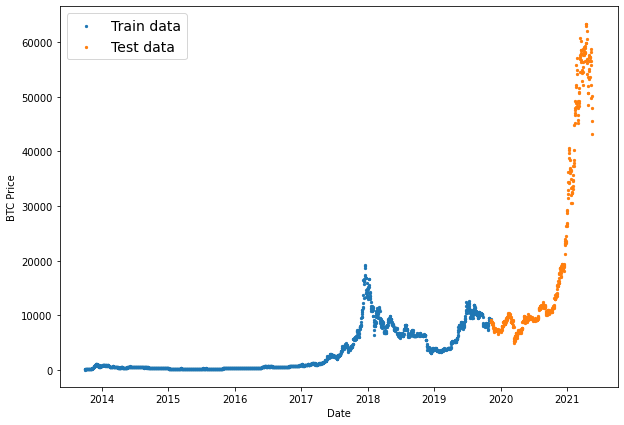

In [17]:
# Plot correctly made splits
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14);
plt.show();

## Create a plotting function

Typing plotting code is tedious, let's functionize it.

In [18]:
# Create a function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    """
    Plots timesteps against values.

    Parameters
    ----------
    timesteps: array of timestep values
    values: array of values
    format: style of plot, default "."
    start: where to start the plot (index)
    end: where to end the plot (index)
    label: label to show on plot

    """
    # Plot the series
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time (s)")
    plt.ylabel("BTC Price")

    if label:
        plt.legend(fontsize=14)
        
    plt.grid(True)

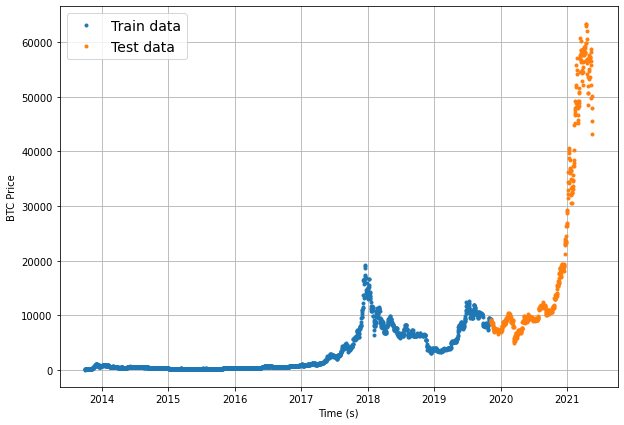

In [19]:
# Testing out plotting function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")

## Modelling Experiements

We've got Bitcoin data, let's run a series of modelling experiments.

Terms to be familiar with:
* **Horizon** = number of timesteps into the future we're going to predict
* **Window size** = number of timesteps we're going to use to predict horizon

Modelling experiments --- (Horizon size, Window size, Extra data):
* 0. Naive model (baseline) --- **(NA, NA, NA)**
* 1. Dense model --- **(1, 7, NA)**
* 1. Same as 1 --- **(1, 30, NA)**
* 2. Same as 1 --- **(7, 30, NA)**
* 4. Conv 1D --- **(1, 7, NA)**
* 5. LSTM --- **(1, 7, NA)**
* 6. Same as 1 (but with multivariate data) --- **(1, 7, Block reward size)**
* 7. N-BEATs Algorithm --- **(1, 7, NA)**
* 8. Ensemble (multiple models optimized on different loss functions) --- **(1, 7, NA)**
* 9. Future prediction model (model to predict future values) --- **(1, 7, NA)**
* 10. Same as 1 (but with turkey data introduced) --- **(1, 7, NA)**

> 🔑📚 : [Reference for Time Series Forecasting](https://otexts.com/fpp3/)

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

> The prediction at timestep t (y_hat) is equal to the value at timestep t-1 (previous timestep) - this is for a horizon of 1.

In [20]:
# Create a naive forcecast
naive_forecast = y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

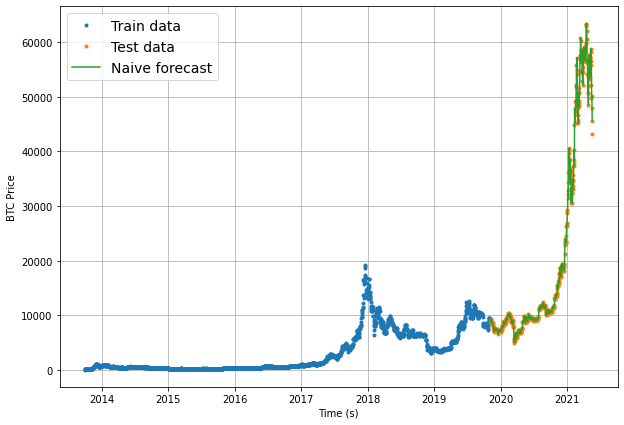

In [21]:
# Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format='-', label="Naive forecast") # everything after first index

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting ...

We're predicting a number, so that means we have a form of a regression problem.

Because we're working on a regression problem, we'll need some regression-like metrics. 

A few common metrics (**the lower the better**):
* MAE - mean absolute error
* MSE - mean squared error

The main thing we are evaluating is: how do our model's forecasts (y_pred) compare against the actual values

In [22]:
import tensorflow as tf

In [23]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality).
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season

🔑: **Note**: For mean absolute scaled error (MASE), a scaled error is **> 1 if the forecast is worse than the naive** and **< 1 if the forecast is better than naive**.

In [24]:
# Test MASE (this vaue should = 1 or be very close to 1 with the naive forecast)
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [53]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return  {"mae": float(mae.numpy()),
          "mse": float(mse.numpy()),
          "rmse": float(rmse.numpy()),
          "mape": float(mape.numpy()),
          "mase": float(mase.numpy())}

In [26]:
# Let's compute the evaluation metrics using our function
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results              

{'mae': 567.980224609375,
 'mse': 1147547.0,
 'rmse': 1071.2362060546875,
 'mape': 2.5165250301361084,
 'mase': 0.9995700120925903}

Save model results

In [27]:
# Saving model results
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=naive_results,
                        file_string="model_0_results")

Success! File written to destination.


In [28]:
# What does the dataset look like?
tf.reduce_mean(y_test), tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

In [29]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


## Format Data Part 2: Windowing our dataset

Why do we window? 

We window our time series dataset to turn our data into a supervised learning problem.

In [30]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [31]:
# Let's setup global variables for window and horizon
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make prediction

In [32]:
# Create function to label window data
def get_labeled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    e.g. if horizon = 1
    Input: [0, 1, 2, 3, 4, 5, 6, 7] -> Output: ([0, 1, 2, 3, 4, 5, 6], [7])

    """
    return x[:,:-horizon], x[:,-horizon:]

In [33]:
# Test out the window labelling function
test_window, test_label = get_labeled_windows(tf.expand_dims(tf.range(8),axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We've got a way to label our windowed data. However, this only works on a small scale. We need a way to do the above across our entire time series.

Our function will:
1. Create a window step of specific window size
2. Use NumPy indexing to create a 2D array of multiple window steps
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series (e.g. the historical price of Bitcoin)
4. Uses our `get_labeled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [34]:
# Import numpy
import numpy as np

In [35]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D array into a 2D array of sequential labelled windows of window size with horizon size labels
    """

    # 1. Create a window of specific window size (add the horizon on the end for labelling)
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)

    # 2. Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-window_size+horizon-1),axis=0).T

    # 3. Index on the target array (a time series)
    windowed_array = x[window_indexes]

    # 4. Get the labelled window
    window, labels = get_labeled_windows(windowed_array, horizon=horizon)

    return window, labels

In [36]:
# Generate full windows and labels
full_windows, full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [37]:
# View the first 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i]}-> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]-> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]-> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]-> Label: [125.96116]


In [38]:
# View the last 3 windows/labels
for i in range(3):
    print(f"Window: {full_windows[i-3]}-> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676]-> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472]-> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361]-> Label: [43144.47129086]


> 🔑 **Note**: There is a function that does similar to the one above [`tf.keras.utils.timeseries_dataset_from_array()`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array)

## Turning windows into training and test sets

In [39]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [40]:
# Create train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [41]:
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances. 

For example if our model performs the best on epoch 55 (but we're training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

In [42]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path ="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              monitor="val_loss",
                                              verbose=0,
                                              save_best_only=True)

## Model 1: Dense model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model: 
* A single dense layer with 128 hidden units and Relu activation
* An output layer with linear activation (no activation)
* Adam optimizer and MAE loss function
* Batch size of 128 (previously we've used 32)
* 100 epochs

In [43]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for reproducible results
tf.random.set_seed(42)

# 1. Build
model_1 = tf.keras.Sequential([
   layers.Dense(128, activation="relu"),
   layers.Dense(HORIZON, activation="linear") # linera activation -> ouput is the same as input
], name="model_1_dense") # name the model so we can save it

# 2. Compile
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"])

# 3. Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 0s 25ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9992 - val_mae: 1005.9992 - val_mse: 3441833.5000
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.5938 - val_loss: 923.2863 - val_mae: 923.2863 - val_mse: 2868221.2500
Epoch 4/100
18/18 [==============================] - 1s 30ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5625 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.7500
Epoch 5/100
18/18 [==============================] - 0s 26ms/step - loss: 165.0895 - mae: 165.0895 - mse: 145490.8125 - val_loss: 895.2236 - val_mae: 895.2236 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 158.5

In [44]:
# Evaluate model on test data
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 585.9752 - mae: 585.9752 - mse: 1197801.2500


[585.9752197265625, 585.9752197265625, 1197801.25]

In [45]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.8750


[568.9510498046875, 568.9510498046875, 1171743.875]

## Making forecasts with a model (on the test dataset)

To make "forecasts" on the test dataset (note: these won't be actual forecasts, they're only psuedo forecasts becasue actual forecasts are into the future), let's write a function to:

1. Take in a trained model
2. Takes in some input data (same kind of data the model was training on)
3. Passes the input data to the model's `predict()` method
4. Returns predictions

In [46]:
def make_preds(model, input_data):
    """
    Uses model to make predictions input_data
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [47]:
# Make predictions of model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 939us/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8861.713, 8769.888, 9015.712, 8795.52 , 8723.812, 8730.111,
        8691.953, 8502.056, 8460.962, 8516.548], dtype=float32)>)

In [55]:
# Evalaute preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results                                 

{'mae': 568.9510498046875,
 'mse': 1171743.875,
 'rmse': 1082.47119140625,
 'mape': 2.544898271560669,
 'mase': 0.999489426612854}

Save model results

In [56]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_1_results,
                        file_string="model_1_results")

Success! File written to destination.


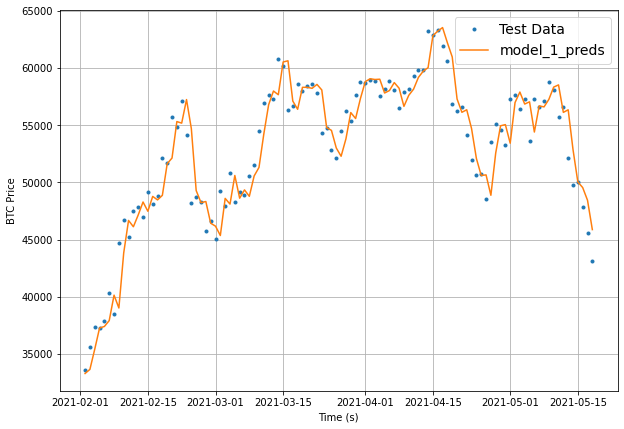

In [65]:
# Let's plot our model 1 predictions
offset = 450
plt.figure(figsize=(10,7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:,0],
                 start=offset,
                 label="Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model_1_preds")


## Model 2: Dense (window = 30, horizon = 1)

In [66]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in past

In [68]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [69]:
# Make train and test windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)                                                                                

(2205, 552, 2205, 552)

In [72]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_2_dense")

# Compile
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit 
model_2.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            batch_size=128,
            verbose=False,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [73]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620


608.9619750976562

In [76]:
# Load in the best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 608.9620


608.9619750976562

In [78]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                         input_data=test_windows)
model_2_preds                         

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(552,), dtype=float32, numpy=
array([ 8946.984 ,  8967.847 ,  8820.252 ,  8615.827 ,  8485.794 ,
        8384.622 ,  8307.78  ,  8171.7856,  8217.463 ,  7839.15  ,
        7362.3716,  7241.631 ,  7111.7964,  7113.5   ,  7151.549 ,
        7358.374 ,  7538.334 ,  7628.2505,  7645.452 ,  7465.5327,
        7427.5684,  7281.351 ,  7320.043 ,  7380.991 ,  7541.0923,
        7543.998 ,  7559.2783,  7436.662 ,  7194.824 ,  7270.313 ,
        7158.483 ,  7335.815 ,  7157.436 ,  7235.8735,  6997.1646,
        6768.8154,  7112.8486,  7281.932 ,  7126.0703,  7329.2383,
        7272.7026,  7298.2256,  7298.365 ,  7241.6226,  7221.505 ,
        7269.7383,  7257.2437,  7432.154 ,  7370.5024,  7196.894 ,
        7278.009 ,  7004.2847,  7208.716 ,  7309.1733,  7451.58  ,
        7698.1133,  8025.408 ,  8096.4185,  8007.9087,  8011.6904,
        8135.065 ,  8216.162 ,  8226.958 ,  8601.827 ,  8900.414 ,
        8842.8545,  8964.693 ,  8932.719 ,  8815.342 ,  8676.931 ,
        8751.0

In [84]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results                     

{'mae': 608.9619750976562,
 'mse': 1281440.625,
 'rmse': 1132.00732421875,
 'mape': 2.769340991973877,
 'mase': 1.0644714832305908}

In [85]:
from Functions.helper_functions import save_model_results_json

des_path = r"Saved Results\10_time_series_forecasting_with_tensorflow"

save_model_results_json(filepath=des_path,
                        var_to_save=model_2_results,
                        file_string="model_2_results")

Success! File written to destination.


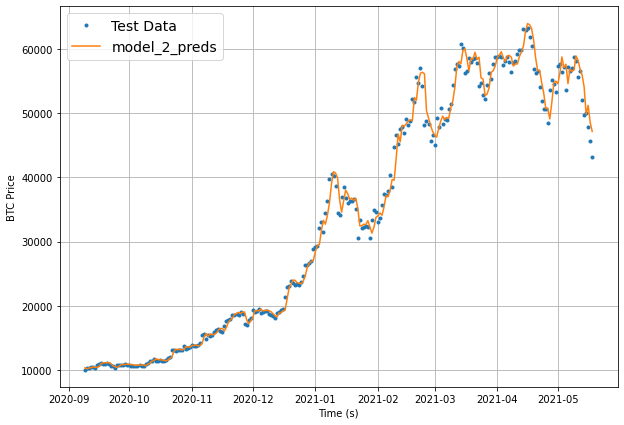

In [86]:
offset = 300
plt.figure(figsize=(10,7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test Data")
plot_time_series(timesteps=X_test[-len(test_windows):],values=model_2_preds,start=offset,format="-",label="model_2_preds")